Basic Tasks for building Machine Learning models
=========================================

In [1]:
# various classifiers/regressors models
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.datasets import make_regression


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#make non numeric feature to numeric
from sklearn.preprocessing import LabelEncoder




Generate artificial data
==================

In [3]:
from sklearn.datasets import make_regression, make_classification
from sklearn.preprocessing import PolynomialFeatures
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
linear_reg=LinearRegression()
linear_reg.fit(X_,y)


LinearRegression()

Process data
===========

In [44]:
from sklearn import svm, datasets
from sklearn.preprocessing import Normalizer
iris = datasets.load_iris()
normalizer=Normalizer(norm="l2")
X_train,X_test,Y_train,Y_test=train_test_split(iris.data,iris.target,test_size=0.2, random_state=42)
X_train=normalizer.transform(X_train)
X_test=normalizer.transform(X_test)



Grid Search to find best parameter
============================

In [45]:

from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10],"gamma":[0.001,1,1.00]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)
print(clf.best_params_['C'],clf.best_params_['gamma'])

1 0.001


Train with best parameter
====================

In [46]:
model = svm.SVC(C=clf.best_params_['C'],kernel="linear")
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_pred,Y_test))

0.6333333333333333


plot metrices
===========

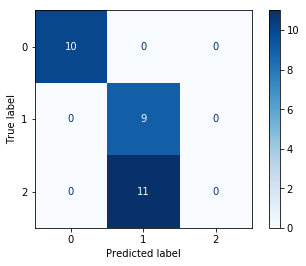

In [47]:
import matplotlib.pyplot as plt
plot_confusion_matrix(model, X_test, Y_test,cmap=plt.cm.Blues,)

Feature Importance/ Selections
=========================

Feature: 0, Score: 0.73678
Feature: 1, Score: 2.71775
Feature: 2, Score: -4.17779
Feature: 3, Score: -1.85155


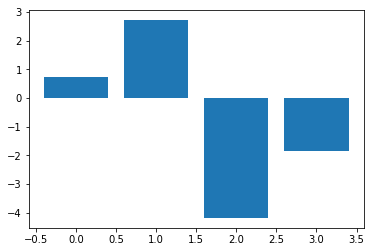

In [48]:
import matplotlib.pyplot as plt
importance=model.coef_[0]
#importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()



In [59]:
# evaluation of a model using 5 features chosen with random forest importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# define the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = RandomForestClassifier()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 90.30


Text(0.5, 1.0, 'Feature Importance')

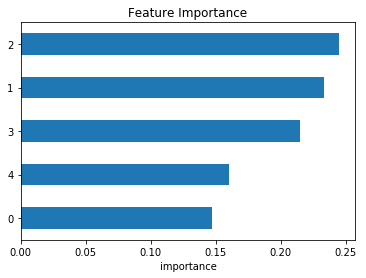

In [60]:
feat_importances = pd.Series(model.feature_importances_, index=[0,1,2,3,4])
feat_importances.nlargest(5).sort_values(ascending = True).plot(kind='barh')
plt.xlabel('importance')
plt.title('Feature Importance')